# Analyze Production Clips

This is a scratch notebook for analyzing the clips created on wellsaidlabs.com

In [ ]:
import re
import sys

# Setup the "PYTHONPATH"
sys.path.insert(0, '../../')

In [41]:
PATH = '~/Downloads/Cloud_SQL_Export_xxxx.csv'

In [42]:
%matplotlib inline

import pandas as pd

df = pandas.read_csv(PATH, names=['user_id', 'text', 'created_at'])
df

,user_id,text,created_at
0,auth0|5c80858f2c38ca2eaab0e168,Test test!,2019-03-07 02:48:49.605917+00
1,auth0|5c6f36c80a45f0439d049e20,This is a test of a really long line generated...,2019-03-09 04:20:01.201527+00
2,auth0|5c6f36c80a45f0439d049e20,This is a test of a really long line generated...,2019-03-09 04:18:25.691944+00
3,auth0|5c6f36c80a45f0439d049e20,This is a test of a really long line generated...,2019-03-09 04:18:20.140214+00
4,auth0|5c6f36c80a45f0439d049e20,Hi there!,2019-03-08 02:44:11.266698+00
...,...,...,...
30862,auth0|5db12562fab8b50c65040f69,NINETY-FIVE percent SKIP the SIMPLE everyday ...,2019-11-17 06:01:51.986229+00
30863,auth0|5db12562fab8b50c65040f69,A POSITIVE attitude is VITAL for us to be PROA...,2019-11-16 16:46:58.870118+00
30864,auth0|5cf00f29b657480eafbea887,We are unable to address your matter over the ...,2019-11-21 21:26:39.840478+00
30865,auth0|5db12562fab8b50c65040f69,"Instead of ROADMAPS, the product teams need to...",2019-11-21 08:20:57.531833+00


In [43]:
# Based on https://stackoverflow.com/questions/45281297/group-by-week-in-pandas
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'] - pd.to_timedelta(7, unit='d')
df['num_clips'] = 1
df = df.groupby([pd.Grouper(key='created_at', freq='W-MON')])['num_clips'].sum().reset_index().sort_values('created_at')
df

,created_at,num_clips
0,2019-03-04 00:00:00+00:00,105
1,2019-03-11 00:00:00+00:00,154
2,2019-03-18 00:00:00+00:00,126
3,2019-03-25 00:00:00+00:00,270
4,2019-04-01 00:00:00+00:00,273
5,2019-04-08 00:00:00+00:00,27
6,2019-04-15 00:00:00+00:00,218
7,2019-04-22 00:00:00+00:00,47
8,2019-04-29 00:00:00+00:00,12
9,2019-05-06 00:00:00+00:00,168


## Visualize Cumalative Clips Over Time

/usr/local/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


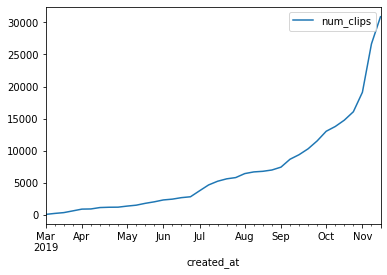

In [44]:
df.set_index('created_at', inplace=True)
df.sort_index().cumsum().plot()